# Problem 1

In [1]:
def calculate_gini_impurity(class_samples):
    total_samples = sum(class_samples)
    if total_samples == 0:
        return 0.0

    gini_impurity = 1.0
    num_classes = len(class_samples)

    for class_count in class_samples:
        class_probability = class_count / total_samples
        gini_impurity -= (class_probability ** 2)

    return gini_impurity

# Test the function with the provided examples
examples = [
    ([15, 15], 0.5),
    ([15, 15, 15], 2/3),
    ([18, 12], 0.48),
    ([30, 0], 0.0)
]

for example in examples:
    class_samples, expected_gini = example
    calculated_gini = calculate_gini_impurity(class_samples)
    print(f"Class Samples: {class_samples}, Expected Gini Impurity: {expected_gini}, Calculated Gini Impurity: {calculated_gini}")


Class Samples: [15, 15], Expected Gini Impurity: 0.5, Calculated Gini Impurity: 0.5
Class Samples: [15, 15, 15], Expected Gini Impurity: 0.6666666666666666, Calculated Gini Impurity: 0.6666666666666665
Class Samples: [18, 12], Expected Gini Impurity: 0.48, Calculated Gini Impurity: 0.48
Class Samples: [30, 0], Expected Gini Impurity: 0.0, Calculated Gini Impurity: 0.0


# Problem 2

In [2]:
def calculate_information_gain(parent_class_samples, left_class_samples, right_class_samples):
    parent_gini = calculate_gini_impurity(parent_class_samples)

    total_left_samples = sum(left_class_samples)
    total_right_samples = sum(right_class_samples)
    total_parent_samples = total_left_samples + total_right_samples

    left_gini = calculate_gini_impurity(left_class_samples)
    right_gini = calculate_gini_impurity(right_class_samples)

    information_gain = parent_gini - ((total_left_samples / total_parent_samples) * left_gini) - ((total_right_samples / total_parent_samples) * right_gini)

    return information_gain

# Test the function with the provided example
left_samples = [10, 30]
right_samples = [20, 5]
parent_samples = [sum(x) for x in zip(left_samples, right_samples)]

information_gain = calculate_information_gain(parent_samples, left_samples, right_samples)
print("Information Gain:", information_gain)


Information Gain: 0.14319526627218943


# Problem 3

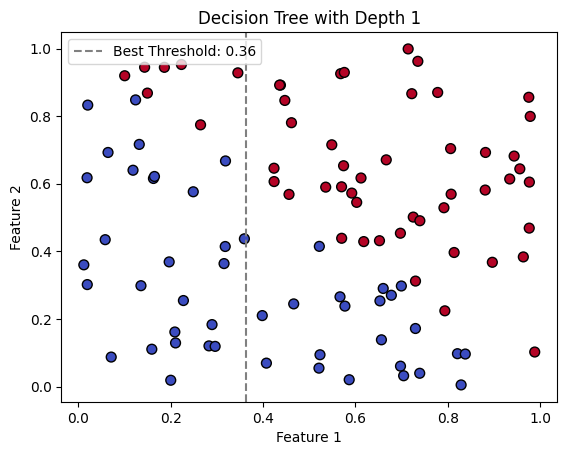

Best Feature Index: 1
Best Threshold: 0.3637107709426226
Best Information Gain: 0.21451249999999997


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_gini_impurity(class_samples):
    total_samples = sum(class_samples)
    if total_samples == 0:
        return 0.0

    gini_impurity = 1.0
    num_classes = len(class_samples)

    for class_count in class_samples:
        class_probability = class_count / total_samples
        gini_impurity -= (class_probability ** 2)

    return gini_impurity

def calculate_information_gain(parent_class_samples, left_class_samples, right_class_samples):
    parent_gini = calculate_gini_impurity(parent_class_samples)

    total_left_samples = sum(left_class_samples)
    total_right_samples = sum(right_class_samples)
    total_parent_samples = total_left_samples + total_right_samples

    left_gini = calculate_gini_impurity(left_class_samples)
    right_gini = calculate_gini_impurity(right_class_samples)

    information_gain = parent_gini - ((total_left_samples / total_parent_samples) * left_gini) - ((total_right_samples / total_parent_samples) * right_gini)

    return information_gain

# Generate synthetic dataset for demonstration
np.random.seed(0)
X = np.random.rand(100, 2)  # Random 2D points
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Decision boundary at x + y = 1

# Split feature space and calculate information gain for all possible splits
best_feature_idx = None
best_threshold = None
best_information_gain = -1

for feature_idx in range(X.shape[1]):
    thresholds = np.unique(X[:, feature_idx])
    for threshold in thresholds:
        left_indices = np.where(X[:, feature_idx] <= threshold)[0]
        right_indices = np.where(X[:, feature_idx] > threshold)[0]

        left_class_counts = np.bincount(y[left_indices], minlength=2)
        right_class_counts = np.bincount(y[right_indices], minlength=2)
        parent_class_counts = np.bincount(y, minlength=2)

        information_gain = calculate_information_gain(parent_class_counts, left_class_counts, right_class_counts)

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_feature_idx = feature_idx
            best_threshold = threshold

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.axvline(x=best_threshold, color='gray', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree with Depth 1')
plt.legend()
plt.show()

print("Best Feature Index:", best_feature_idx)
print("Best Threshold:", best_threshold)
print("Best Information Gain:", best_information_gain)


# Problem 4

In [4]:

class ScratchDecisionTreeClassifierDepth1:
    def _init_(self):
        self.best_feature_idx = None
        self.best_threshold = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y):
        best_information_gain = -1

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_idx] <= threshold)[0]
                right_indices = np.where(X[:, feature_idx] > threshold)[0]

                left_class_counts = np.bincount(y[left_indices], minlength=2)
                right_class_counts = np.bincount(y[right_indices], minlength=2)
                parent_class_counts = np.bincount(y, minlength=2)

                information_gain = calculate_information_gain(parent_class_counts, left_class_counts, right_class_counts)

                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    self.best_feature_idx = feature_idx
                    self.best_threshold = threshold
                    self.left_class = np.argmax(left_class_counts)
                    self.right_class = np.argmax(right_class_counts)

    def predict(self, X):
        predicted_classes = []
        for sample in X:
            if sample[self.best_feature_idx] <= self.best_threshold:
                predicted_classes.append(self.left_class)
            else:
                predicted_classes.append(self.right_class)
        return np.array(predicted_classes)

# Example usage:
# Initialize and fit the model
model = ScratchDecisionTreeClassifierDepth1()
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([0, 1, 0, 1])
model.fit(X_train, y_train)

# Predict using the trained model
X_test = np.array([[1.5, 2.5], [3.5, 4.5]])
predictions = model.predict(X_test)
print("Predictions:", predictions)

Predictions: [1 1]


# Problem 5

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the Iris dataset and split into training and test sets
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.3, random_state=0)

# Instantiate the scratch decision tree classifier and fit it to the training data
clf = ScratchDecisionTreeClassifierDepth1()
clf.fit(X_train, y_train)

# Make predictions on the training data
train_prediction = clf.predict(X_train)

# Evaluate the model using accuracy, precision, and recall
accuracy = accuracy_score(y_train, train_prediction)
precision = precision_score(y_train, train_prediction, average='macro')
recall = recall_score(y_train, train_prediction, average='macro')

# Output the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.6952380952380952
Precision: 0.5164319248826291
Recall: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Problem 6

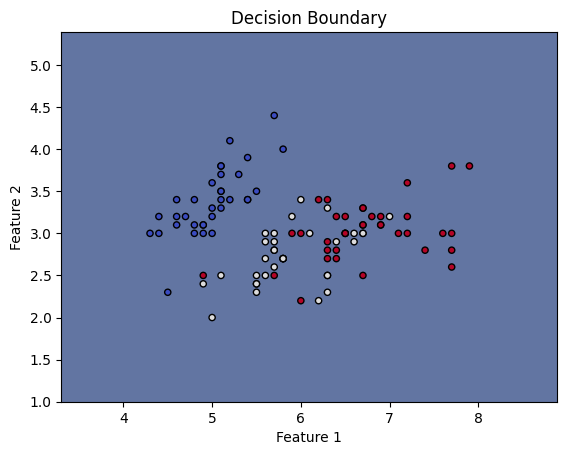

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, classifier):
    # Define the range of the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class labels for each point in the grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Example usage:
# Assuming you have trained your classifier and have X_train and y_train
# Replace 'model' with your trained classifier
plot_decision_boundary(X_train, y_train, model)


# Problem 7

In [7]:
import numpy as np

class ScratchDecisionTreeClassifierDepth2:
    def _init_(self):
        self.left_tree = None
        self.right_tree = None
        self.feature_idx = None
        self.threshold = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y, depth=2):
        if depth == 0 or len(np.unique(y)) == 1:
            self.left_class = np.argmax(np.bincount(y))
            self.right_class = np.argmax(np.bincount(y))
            return

        best_information_gain = -1

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_idx] <= threshold)[0]
                right_indices = np.where(X[:, feature_idx] > threshold)[0]

                left_class_counts = np.bincount(y[left_indices], minlength=2)
                right_class_counts = np.bincount(y[right_indices], minlength=2)
                parent_class_counts = np.bincount(y, minlength=2)

                information_gain = self._calculate_information_gain(parent_class_counts, left_class_counts, right_class_counts)

                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    self.feature_idx = feature_idx
                    self.threshold = threshold

                    self.left_tree = ScratchDecisionTreeClassifierDepth2()
                    self.right_tree = ScratchDecisionTreeClassifierDepth2()
                    self.left_tree.fit(X[left_indices], y[left_indices], depth - 1)
                    self.right_tree.fit(X[right_indices], y[right_indices], depth - 1)

    def _calculate_gini_impurity(self, class_samples):
        total_samples = sum(class_samples)
        if total_samples == 0:
            return 0.0

        gini_impurity = 1.0
        num_classes = len(class_samples)

        for class_count in class_samples:
            class_probability = class_count / total_samples
            gini_impurity -= (class_probability ** 2)

        return gini_impurity

    def _calculate_information_gain(self, parent_class_samples, left_class_samples, right_class_samples):
        parent_gini = self._calculate_gini_impurity(parent_class_samples)

        total_left_samples = sum(left_class_samples)
        total_right_samples = sum(right_class_samples)
        total_parent_samples = total_left_samples + total_right_samples

        left_gini = self._calculate_gini_impurity(left_class_samples)
        right_gini = self._calculate_gini_impurity(right_class_samples)

        information_gain = parent_gini - ((total_left_samples / total_parent_samples) * left_gini) - ((total_right_samples / total_parent_samples) * right_gini)

        return information_gain

    def predict(self, X):
        predicted_classes = []
        for sample in X:
            if sample[self.feature_idx] <= self.threshold:
                if self.left_tree is not None:
                    predicted_class = self.left_tree.predict([sample])[0]
                else:
                    predicted_class = self.left_class
            else:
                if self.right_tree is not None:
                    predicted_class = self.right_tree.predict([sample])[0]
                else:
                    predicted_class = self.right_class
            predicted_classes.append(predicted_class)
        return np.array(predicted_classes)


# Problem 8

In [8]:
import numpy as np

class ScratchDecisionTreeClassifierDepthInf:
    def _init_(self, max_depth=None):
        self.max_depth = max_depth
        self.left_tree = None
        self.right_tree = None
        self.feature_idx = None
        self.threshold = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y, depth=0):
        if self.max_depth is not None and depth >= self.max_depth:
            self.left_class = np.argmax(np.bincount(y))
            self.right_class = np.argmax(np.bincount(y))
            return

        if len(np.unique(y)) == 1:
            self.left_class = y[0]
            self.right_class = y[0]
            return

        best_information_gain = -1

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_idx] <= threshold)[0]
                right_indices = np.where(X[:, feature_idx] > threshold)[0]

                left_class_counts = np.bincount(y[left_indices], minlength=2)
                right_class_counts = np.bincount(y[right_indices], minlength=2)
                parent_class_counts = np.bincount(y, minlength=2)

                information_gain = self._calculate_information_gain(parent_class_counts, left_class_counts, right_class_counts)

                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    self.feature_idx = feature_idx
                    self.threshold = threshold

                    self.left_tree = ScratchDecisionTreeClassifierDepthInf(max_depth=self.max_depth)
                    self.right_tree = ScratchDecisionTreeClassifierDepthInf(max_depth=self.max_depth)
                    self.left_tree.fit(X[left_indices], y[left_indices], depth + 1)
                    self.right_tree.fit(X[right_indices], y[right_indices], depth + 1)

    def _calculate_gini_impurity(self, class_samples):
        total_samples = sum(class_samples)
        if total_samples == 0:
            return 0.0

        gini_impurity = 1.0
        num_classes = len(class_samples)

        for class_count in class_samples:
            class_probability = class_count / total_samples
            gini_impurity -= (class_probability ** 2)

        return gini_impurity

    def _calculate_information_gain(self, parent_class_samples, left_class_samples, right_class_samples):
        parent_gini = self._calculate_gini_impurity(parent_class_samples)

        total_left_samples = sum(left_class_samples)
        total_right_samples = sum(right_class_samples)
        total_parent_samples = total_left_samples + total_right_samples

        left_gini = self._calculate_gini_impurity(left_class_samples)
        right_gini = self._calculate_gini_impurity(right_class_samples)

        information_gain = parent_gini - ((total_left_samples / total_parent_samples) * left_gini) - ((total_right_samples / total_parent_samples) * right_gini)

        return information_gain

    def predict(self, X):
        predicted_classes = []
        for sample in X:
            if sample[self.feature_idx] <= self.threshold:
                if self.left_tree is not None:
                    predicted_class = self.left_tree.predict([sample])[0]
                else:
                    predicted_class = self.left_class
            else:
                if self.right_tree is not None:
                    predicted_class = self.right_tree.predict([sample])[0]
                else:
                    predicted_class = self.right_class
            predicted_classes.append(predicted_class)
        return np.array(predicted_classes)